# One Patient Data Analysis

## Load Libraries

In [144]:
import pandas as pd
import os
import datetime as dt

from matplotlib import pyplot as plt
import seaborn as sns

## Read Data

In [5]:
os.getcwd()

'/superbugai-data/yash/chapter_1/workspace/EHRQC/notebooks/python'

In [6]:
dataFilePath = '../../data/one-pat-vitals.csv'
dataDf = pd.read_csv(dataFilePath)

In [13]:
dataDf

,PATIENT_ID,TYPE,RESULT,ORDER_DATETIME,PERFORMED_DATETIME,NORMAL_LOW,NORMAL_HIGH,CRITICAL_LOW,CRITICAL_HIGH
0,2169055,Urea,6.1,2016-09-29 12:24:44.000,2016-09-29 15:20:41.000,2.5,7.2,,>30.0
1,2169055,Eosinophils,0.00,2016-10-08 09:09:11.000,2016-10-08 09:59:52.000,0.00,0.50,,
2,2169055,eGFR,82,2016-09-29 12:24:44.000,2016-09-29 15:20:42.000,>=90,,,
3,2169055,INR,1.1,2016-09-29 12:24:44.000,2016-09-29 15:23:15.000,0.9,1.3,,>3.9
4,2169055,Sodium,141,2016-10-07 18:50:55.000,2016-10-08 10:10:41.000,135,145,125,155
...,...,...,...,...,...,...,...,...,...
42573,2169055,Respiratory Distress,Nil,NaN,2021-05-04 17:50:13.000,NaN,NaN,NaN,NaN
42574,2169055,Respiratory Rate,18,NaN,2021-05-04 17:50:13.000,11,24,6,36
42575,2169055,WCDC_Discharge Destination,Home,NaN,2021-05-04 20:09:24.000,NaN,NaN,NaN,NaN
42576,2169055,WCDC_GP Details Confirmed,Yes,NaN,2021-05-04 20:09:24.000,NaN,NaN,NaN,NaN


In [86]:
dataDf['PERFORMED_DATETIME'] = dataDf['PERFORMED_DATETIME'].apply(lambda x : pd.to_datetime(str(x)))
dataDf['PERFORMED_DATE'] = dataDf.PERFORMED_DATETIME.dt.date

## Vital Type Bar Plot

In [14]:
len(dataDf.TYPE.unique())

1825

In [39]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [48]:
numericIndicies = [is_number(str(r)) for r in dataDf.RESULT]

In [55]:
dataDf['IS_NUMERIC'] = numericIndicies

In [67]:
typeValueCounts = dataDf[dataDf.IS_NUMERIC].TYPE.value_counts()

In [79]:
typeValueCounts

SpO2                                   582
Respiratory Rate                       582
Diastolic Blood Pressure               553
Systolic Blood Pressure                548
Temperature Temporal                   411
                                      ... 
Urine Erythrocytes                       1
sodium phosphate                         1
Estimated Intake EN Protein Per Min      1
Estimated Intake EN Protein              1
bvc_total_score                          1
Name: TYPE, Length: 457, dtype: int64

In [80]:
typeValueCounts.to_csv('../../data/unique_types.csv')

## Heart Rate

In [114]:
heartRateDf = dataDf[dataDf.TYPE == 'Heart Rate Monitored']
heartRateDf

,PATIENT_ID,TYPE,RESULT,ORDER_DATETIME,PERFORMED_DATETIME,NORMAL_LOW,NORMAL_HIGH,CRITICAL_LOW,CRITICAL_HIGH,IS_NUMERIC,PERFORMED_DATE
3931,2169055,Heart Rate Monitored,46,NaN,2019-07-25 09:31:30,51,119,40,140,True,2019-07-25
3932,2169055,Heart Rate Monitored,50,NaN,2019-07-25 09:56:35,51,119,40,140,True,2019-07-25
3936,2169055,Heart Rate Monitored,46,NaN,2019-07-25 10:32:35,51,119,40,140,True,2019-07-25
4000,2169055,Heart Rate Monitored,46,NaN,2019-07-25 09:31:54,51,119,40,140,True,2019-07-25
4001,2169055,Heart Rate Monitored,44,NaN,2019-07-25 09:42:05,51,119,40,140,True,2019-07-25
...,...,...,...,...,...,...,...,...,...,...,...
39571,2169055,Heart Rate Monitored,67,NaN,2021-04-14 01:01:29,51,119,40,140,True,2021-04-14
39976,2169055,Heart Rate Monitored,66,NaN,2021-04-14 22:35:41,51,119,40,140,True,2021-04-14
41794,2169055,Heart Rate Monitored,78,NaN,2021-04-20 14:03:44,51,119,40,140,True,2021-04-20
41921,2169055,Heart Rate Monitored,74,NaN,2021-04-20 21:59:37,51,119,40,140,True,2021-04-20


In [115]:
heartRateDf['RESULT'] = heartRateDf['RESULT'].astype(float)

/tmp/ipykernel_4193604/3253715514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heartRateDf['RESULT'] = heartRateDf['RESULT'].astype(float)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f07e5569760>,
 'caps': [<matplotlib.lines.Line2D at 0x7f07e5569e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f07e55693d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f07e55775e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f07e5577970>],
 'means': []}

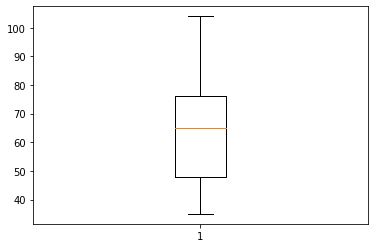

In [116]:
plt.boxplot(heartRateDf.RESULT)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f07e54c8d00>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f07e5547760>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f07e54d8250>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f07e54d8580>}

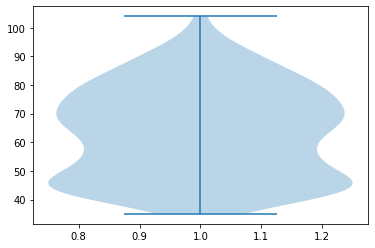

In [117]:
plt.violinplot(heartRateDf.RESULT)

In [118]:
heartRateValueCounts = heartRateDf.PERFORMED_DATE.value_counts()
heartRateValueCounts

2020-11-27    47
2020-11-28    25
2020-11-29    21
2020-11-26    20
2020-11-30    19
              ..
2021-02-09     1
2021-02-08     1
2021-02-07     1
2021-02-04     1
2021-05-03     1
Name: PERFORMED_DATE, Length: 81, dtype: int64

<BarContainer object of 81 artists>

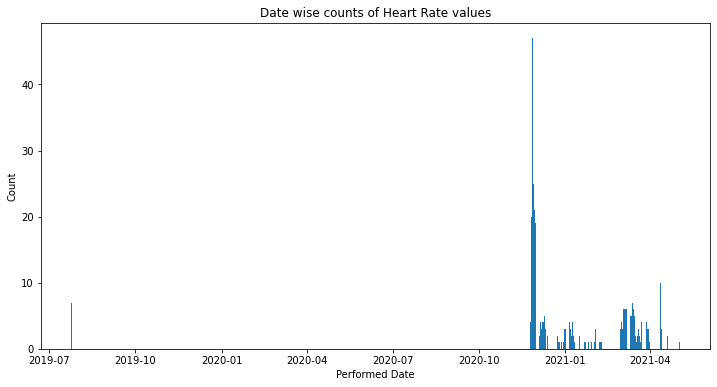

In [119]:
plt.figure(figsize=(12, 6))
plt.title('Date wise counts of Heart Rate values')
plt.xlabel('Performed Date')
plt.ylabel('Count')
plt.bar(x = heartRateValueCounts.index, height = heartRateValueCounts)

In [122]:
heartRateValueMeans = heartRateDf.groupby('PERFORMED_DATE').RESULT.mean()
heartRateValueMeans

PERFORMED_DATE
2019-07-25    49.428571
2020-11-25    56.000000
2020-11-26    51.800000
2020-11-27    49.127660
2020-11-28    43.880000
                ...    
2021-04-12    84.000000
2021-04-13    80.300000
2021-04-14    66.000000
2021-04-20    76.000000
2021-05-03    78.000000
Name: RESULT, Length: 81, dtype: float64

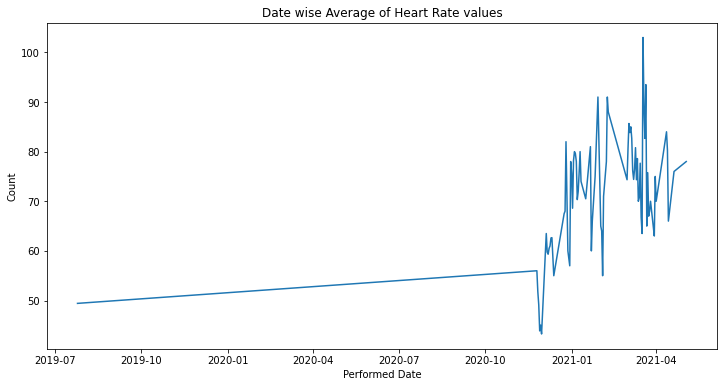

In [163]:
plt.figure(figsize=(12, 6))
plt.title('Date wise Average of Heart Rate values')
plt.xlabel('Performed Date')
plt.ylabel('Count')
plt.plot(heartRateValueMeans.index, heartRateValueMeans)

## Temperature

In [156]:
temperatureRateDf = dataDf[dataDf.TYPE == 'Temperature Temporal']
temperatureRateDf

,PATIENT_ID,TYPE,RESULT,ORDER_DATETIME,PERFORMED_DATETIME,NORMAL_LOW,NORMAL_HIGH,CRITICAL_LOW,CRITICAL_HIGH,IS_NUMERIC,PERFORMED_DATE
3839,2169055,Temperature Temporal,36.8,NaN,2019-07-25 10:06:17,35.5,38.3,NaN,NaN,True,2019-07-25
4104,2169055,Temperature Temporal,37.5,NaN,2019-07-25 10:32:35,35.5,38.3,NaN,NaN,True,2019-07-25
13165,2169055,Temperature Temporal,36.0,NaN,2020-11-28 11:02:08,35.5,38.3,NaN,NaN,True,2020-11-28
13223,2169055,Temperature Temporal,36.5,NaN,2020-11-28 13:10:36,35.5,38.3,NaN,NaN,True,2020-11-28
13341,2169055,Temperature Temporal,36.5,NaN,2020-11-28 16:03:16,35.5,38.3,NaN,NaN,True,2020-11-28
...,...,...,...,...,...,...,...,...,...,...,...
42434,2169055,Temperature Temporal,36.9,NaN,2021-05-04 05:40:15,35.5,38.3,NaN,NaN,True,2021-05-04
42460,2169055,Temperature Temporal,36.4,NaN,2021-05-04 08:22:56,35.5,38.3,NaN,NaN,True,2021-05-04
42506,2169055,Temperature Temporal,36.2,NaN,2021-05-04 10:34:11,35.5,38.3,NaN,NaN,True,2021-05-04
42531,2169055,Temperature Temporal,35.6,NaN,2021-05-04 14:18:53,35.5,38.3,NaN,NaN,True,2021-05-04


In [157]:
temperatureRateDf['RESULT'] = temperatureRateDf['RESULT'].astype(float)

/tmp/ipykernel_4193604/1869672491.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temperatureRateDf['RESULT'] = temperatureRateDf['RESULT'].astype(float)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f07b02da1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f07b02da8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f07b02ccdf0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f07b02e4040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f07b02e43d0>],
 'means': []}

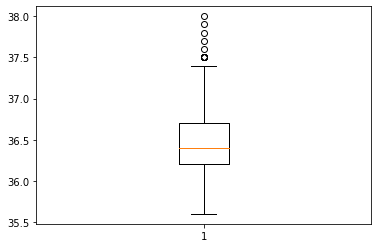

In [158]:
plt.boxplot(temperatureRateDf.RESULT)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f07b02bb1c0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f07b037f700>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f07b02bb6d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f07b02bba00>}

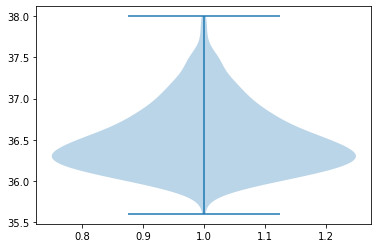

In [159]:
plt.violinplot(temperatureRateDf.RESULT)

In [160]:
temperatureValueCounts = temperatureRateDf.PERFORMED_DATE.value_counts()
temperatureValueCounts

2021-04-13    10
2021-04-17     9
2020-12-01     9
2021-03-02     8
2021-03-29     8
              ..
2021-02-11     1
2021-02-12     1
2021-02-13     1
2021-02-14     1
2021-02-09     1
Name: PERFORMED_DATE, Length: 121, dtype: int64

<BarContainer object of 121 artists>

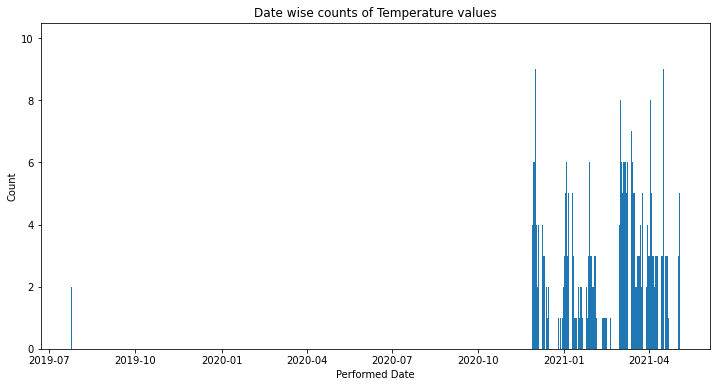

In [161]:
plt.figure(figsize=(12, 6))
plt.title('Date wise counts of Temperature values')
plt.xlabel('Performed Date')
plt.ylabel('Count')
plt.bar(x = temperatureValueCounts.index, height = temperatureValueCounts)

In [162]:
temperatureValueMeans = temperatureRateDf.groupby('PERFORMED_DATE').RESULT.mean()
temperatureValueMeans

PERFORMED_DATE
2019-07-25    37.150000
2020-11-28    36.325000
2020-11-29    36.883333
2020-11-30    37.250000
2020-12-01    36.988889
                ...    
2021-04-20    36.200000
2021-04-21    36.466667
2021-04-22    36.200000
2021-05-03    36.533333
2021-05-04    36.280000
Name: RESULT, Length: 121, dtype: float64

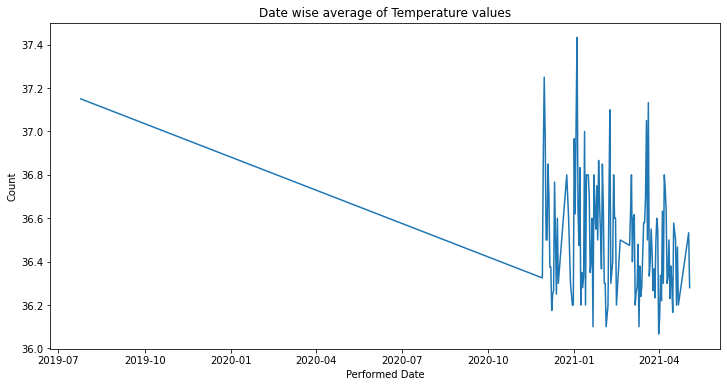

In [164]:
plt.figure(figsize=(12, 6))
plt.title('Date wise average of Temperature values')
plt.xlabel('Performed Date')
plt.ylabel('Count')
plt.plot(temperatureValueMeans.index, temperatureValueMeans)

## Respiratory Rate

In [165]:
respRateDf = dataDf[dataDf.TYPE == 'Respiratory Rate']
respRateDf

,PATIENT_ID,TYPE,RESULT,ORDER_DATETIME,PERFORMED_DATETIME,NORMAL_LOW,NORMAL_HIGH,CRITICAL_LOW,CRITICAL_HIGH,IS_NUMERIC,PERFORMED_DATE
397,2169055,Respiratory Rate,20,NaN,2016-09-29 14:40:48,14,20,,,True,2016-09-29
3840,2169055,Respiratory Rate,16,NaN,2019-07-25 10:06:17,11,24,6,36,True,2019-07-25
3881,2169055,Respiratory Rate,12,NaN,2019-07-25 09:41:57,11,24,6,36,True,2019-07-25
3901,2169055,Respiratory Rate,14,NaN,2019-07-25 08:58:09,11,24,6,36,True,2019-07-25
3925,2169055,Respiratory Rate,12,NaN,2019-07-25 09:56:27,11,24,6,36,True,2019-07-25
...,...,...,...,...,...,...,...,...,...,...,...
42449,2169055,Respiratory Rate,16,NaN,2021-05-04 08:22:56,11,24,6,36,True,2021-05-04
42513,2169055,Respiratory Rate,18,NaN,2021-05-04 10:34:11,11,24,6,36,True,2021-05-04
42524,2169055,Respiratory Rate,16,NaN,2021-05-04 13:28:24,11,24,6,36,True,2021-05-04
42539,2169055,Respiratory Rate,16,NaN,2021-05-04 14:18:53,11,24,6,36,True,2021-05-04


In [166]:
respRateDf['RESULT'] = respRateDf['RESULT'].astype(float)

/tmp/ipykernel_4193604/402550580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respRateDf['RESULT'] = respRateDf['RESULT'].astype(float)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f07ab7cdcd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f07ab7dd430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f07ab7cd940>],
 'medians': [<matplotlib.lines.Line2D at 0x7f07ab7ddb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f07ab7ddee0>],
 'means': []}

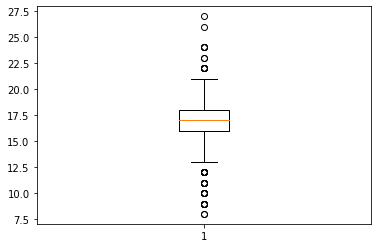

In [167]:
plt.boxplot(respRateDf.RESULT)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f07ab7fb850>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f07ab7b5f40>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f07ab746520>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f07ab746850>}

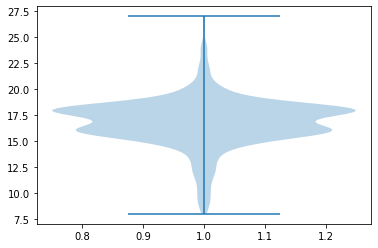

In [168]:
plt.violinplot(respRateDf.RESULT)

In [169]:
respRateValueCounts = respRateDf.PERFORMED_DATE.value_counts()
respRateValueCounts

2020-11-27    47
2020-11-28    25
2020-11-30    22
2020-11-26    20
2020-11-29    20
              ..
2021-02-09     1
2021-02-11     1
2021-02-12     1
2021-02-13     1
2021-02-07     1
Name: PERFORMED_DATE, Length: 125, dtype: int64

<BarContainer object of 125 artists>

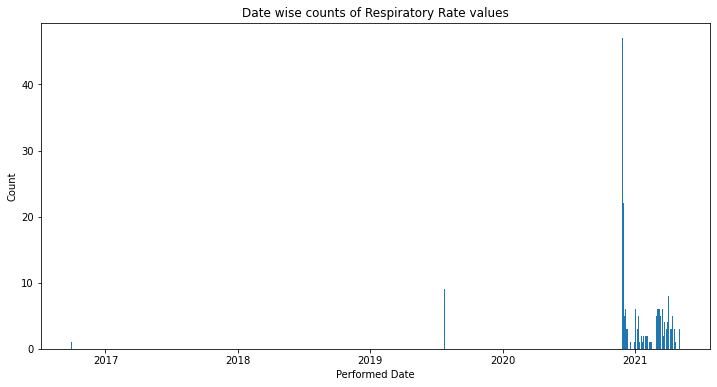

In [170]:
plt.figure(figsize=(12, 6))
plt.title('Date wise counts of Respiratory Rate values')
plt.xlabel('Performed Date')
plt.ylabel('Count')
plt.bar(x = respRateValueCounts.index, height = respRateValueCounts)

In [171]:
respRateValueMeans = respRateDf.groupby('PERFORMED_DATE').RESULT.mean()
respRateValueMeans

PERFORMED_DATE
2016-09-29    20.000000
2019-07-25    14.222222
2020-11-25    18.500000
2020-11-26    12.400000
2020-11-27    15.936170
                ...    
2021-04-20    17.333333
2021-04-21    17.500000
2021-04-22    18.000000
2021-05-03    14.666667
2021-05-04    16.800000
Name: RESULT, Length: 125, dtype: float64

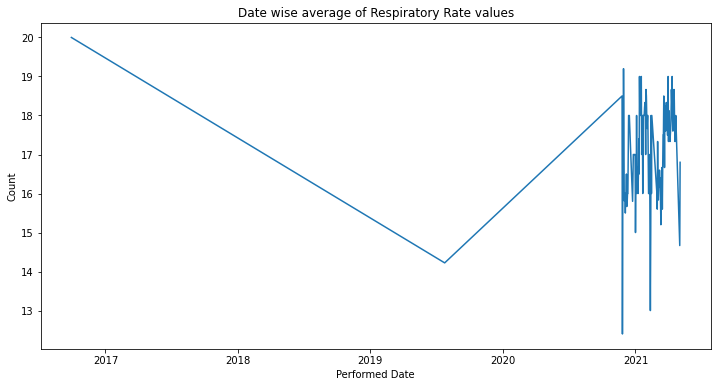

In [172]:
plt.figure(figsize=(12, 6))
plt.title('Date wise average of Respiratory Rate values')
plt.xlabel('Performed Date')
plt.ylabel('Count')
plt.plot(respRateValueMeans.index, respRateValueMeans)

## Diastolic Blood Pressure

In [173]:
dbpDf = dataDf[dataDf.TYPE == 'Diastolic Blood Pressure']
dbpDf

,PATIENT_ID,TYPE,RESULT,ORDER_DATETIME,PERFORMED_DATETIME,NORMAL_LOW,NORMAL_HIGH,CRITICAL_LOW,CRITICAL_HIGH,IS_NUMERIC,PERFORMED_DATE
398,2169055,Diastolic Blood Pressure,86,NaN,2016-09-29 14:40:48,60,90,,,True,2016-09-29
3879,2169055,Diastolic Blood Pressure,72,NaN,2019-07-25 09:31:15,60,90,NaN,NaN,True,2019-07-25
3956,2169055,Diastolic Blood Pressure,85,NaN,2019-07-25 09:56:24,60,90,NaN,NaN,True,2019-07-25
3975,2169055,Diastolic Blood Pressure,71,NaN,2019-07-25 09:41:53,60,90,NaN,NaN,True,2019-07-25
4003,2169055,Diastolic Blood Pressure,71,NaN,2019-07-25 10:06:17,60,90,NaN,NaN,True,2019-07-25
...,...,...,...,...,...,...,...,...,...,...,...
42463,2169055,Diastolic Blood Pressure,75,NaN,2021-05-04 08:22:56,60,90,NaN,NaN,True,2021-05-04
42508,2169055,Diastolic Blood Pressure,83,NaN,2021-05-04 10:34:11,60,90,NaN,NaN,True,2021-05-04
42519,2169055,Diastolic Blood Pressure,73,NaN,2021-05-04 13:28:24,60,90,NaN,NaN,True,2021-05-04
42534,2169055,Diastolic Blood Pressure,83,NaN,2021-05-04 14:18:53,60,90,NaN,NaN,True,2021-05-04


In [174]:
dbpDf['RESULT'] = dbpDf['RESULT'].astype(float)

/tmp/ipykernel_4193604/932218025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dbpDf['RESULT'] = dbpDf['RESULT'].astype(float)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f07ab549820>,
 'caps': [<matplotlib.lines.Line2D at 0x7f07ab549f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f07ab549490>],
 'medians': [<matplotlib.lines.Line2D at 0x7f07ab5566a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f07ab556a30>],
 'means': []}

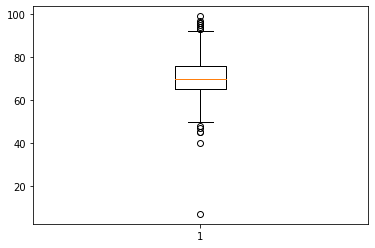

In [175]:
plt.boxplot(dbpDf.RESULT)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f07ab5287f0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f07ab62adf0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f07ab528e20>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f07ab5371c0>}

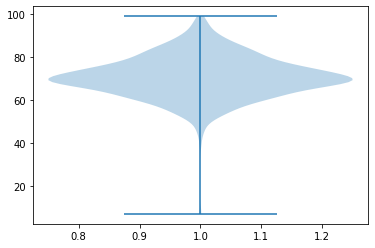

In [176]:
plt.violinplot(dbpDf.RESULT)

In [177]:
dbpValueCounts = dbpDf.PERFORMED_DATE.value_counts()
dbpValueCounts

2020-11-27    44
2020-11-28    27
2020-11-30    22
2020-11-29    21
2020-12-01    16
              ..
2021-01-14     1
2021-01-17     1
2021-01-21     1
2021-01-22     1
2016-09-29     1
Name: PERFORMED_DATE, Length: 117, dtype: int64

<BarContainer object of 117 artists>

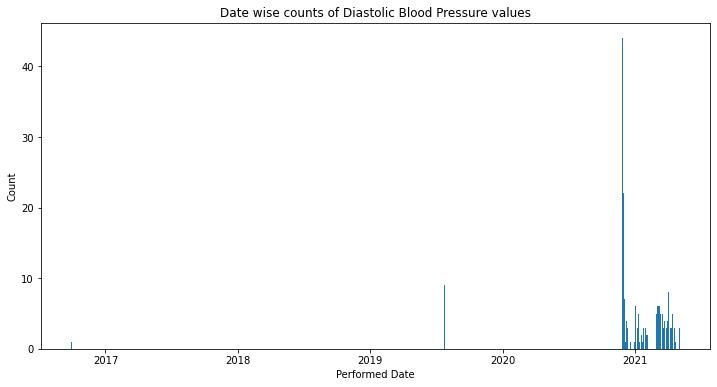

In [178]:
plt.figure(figsize=(12, 6))
plt.title('Date wise counts of Diastolic Blood Pressure values')
plt.xlabel('Performed Date')
plt.ylabel('Count')
plt.bar(x = dbpValueCounts.index, height = dbpValueCounts)

In [179]:
dbpValueMeans = dbpDf.groupby('PERFORMED_DATE').RESULT.mean()
dbpValueMeans

PERFORMED_DATE
2016-09-29    86.000000
2019-07-25    72.444444
2020-11-17    71.000000
2020-11-25    96.000000
2020-11-26    69.000000
                ...    
2021-04-20    76.666667
2021-04-21    70.750000
2021-04-22    83.000000
2021-05-03    69.666667
2021-05-04    72.166667
Name: RESULT, Length: 117, dtype: float64

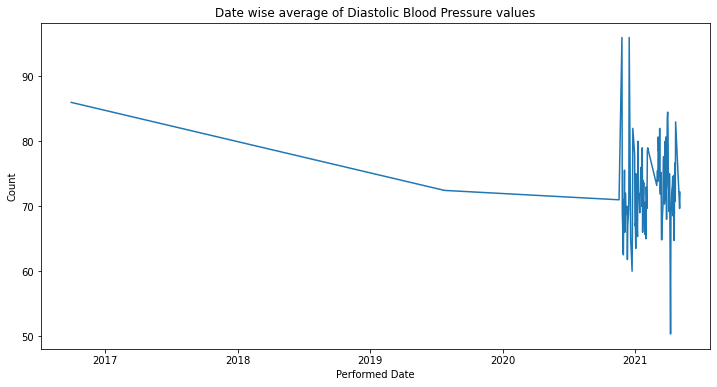

In [180]:
plt.figure(figsize=(12, 6))
plt.title('Date wise average of Diastolic Blood Pressure values')
plt.xlabel('Performed Date')
plt.ylabel('Count')
plt.plot(dbpValueMeans.index, dbpValueMeans)

## Systolic Blood Pressure

In [181]:
sbpDf = dataDf[dataDf.TYPE == 'Systolic Blood Pressure']
sbpDf

,PATIENT_ID,TYPE,RESULT,ORDER_DATETIME,PERFORMED_DATETIME,NORMAL_LOW,NORMAL_HIGH,CRITICAL_LOW,CRITICAL_HIGH,IS_NUMERIC,PERFORMED_DATE
395,2169055,Systolic Blood Pressure,134,NaN,2016-09-29 14:40:48,90,140,,,True,2016-09-29
3837,2169055,Systolic Blood Pressure,122,NaN,2019-07-25 09:41:53,101,179,90,200,True,2019-07-25
3900,2169055,Systolic Blood Pressure,122,NaN,2019-07-25 08:58:05,101,179,90,200,True,2019-07-25
4046,2169055,Systolic Blood Pressure,128,NaN,2019-07-25 09:31:40,101,179,90,200,True,2019-07-25
4063,2169055,Systolic Blood Pressure,112,NaN,2019-07-25 07:11:30,101,179,90,200,True,2019-07-25
...,...,...,...,...,...,...,...,...,...,...,...
42445,2169055,Systolic Blood Pressure,124,NaN,2021-05-04 08:22:56,101,179,90,200,True,2021-05-04
42509,2169055,Systolic Blood Pressure,132,NaN,2021-05-04 10:34:11,101,179,90,200,True,2021-05-04
42520,2169055,Systolic Blood Pressure,147,NaN,2021-05-04 13:28:24,101,179,90,200,True,2021-05-04
42535,2169055,Systolic Blood Pressure,117,NaN,2021-05-04 14:18:53,101,179,90,200,True,2021-05-04


In [182]:
sbpDf['RESULT'] = sbpDf['RESULT'].astype(float)

/tmp/ipykernel_4193604/2111407339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbpDf['RESULT'] = sbpDf['RESULT'].astype(float)


{'whiskers': [<matplotlib.lines.Line2D at 0x7f07ab2c19d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f07ab2ce130>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f07ab2c1640>],
 'medians': [<matplotlib.lines.Line2D at 0x7f07ab2ce850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f07ab2cebe0>],
 'means': []}

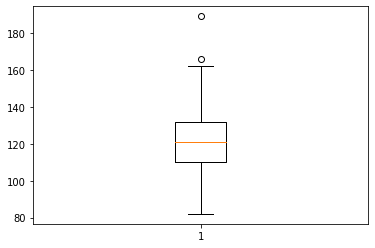

In [183]:
plt.boxplot(sbpDf.RESULT)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f07ab29efd0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f07ab29eeb0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f07ab2af520>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f07ab2af850>}

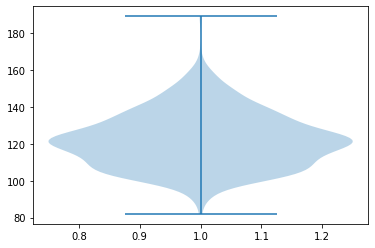

In [184]:
plt.violinplot(sbpDf.RESULT)

In [185]:
sbpValueCounts = sbpDf.PERFORMED_DATE.value_counts()
sbpValueCounts

2020-11-27    44
2020-11-28    27
2020-11-30    22
2020-11-29    21
2020-12-01    16
              ..
2021-01-22     1
2021-01-21     1
2021-01-13     1
2021-01-14     1
2016-09-29     1
Name: PERFORMED_DATE, Length: 116, dtype: int64

<BarContainer object of 116 artists>

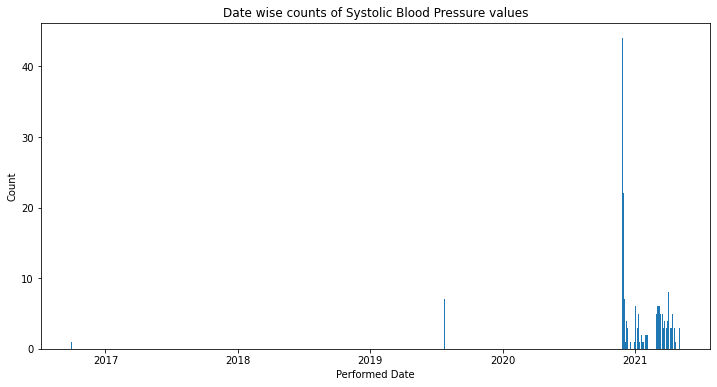

In [186]:
plt.figure(figsize=(12, 6))
plt.title('Date wise counts of Systolic Blood Pressure values')
plt.xlabel('Performed Date')
plt.ylabel('Count')
plt.bar(x = sbpValueCounts.index, height = sbpValueCounts)

In [187]:
sbpValueMeans = sbpDf.groupby('PERFORMED_DATE').RESULT.mean()
sbpValueMeans

PERFORMED_DATE
2016-09-29    134.000000
2019-07-25    123.571429
2020-11-17    101.000000
2020-11-25    119.000000
2020-11-26    122.200000
                 ...    
2021-04-20    121.333333
2021-04-21    117.500000
2021-04-22    103.000000
2021-05-03    153.666667
2021-05-04    132.833333
Name: RESULT, Length: 116, dtype: float64

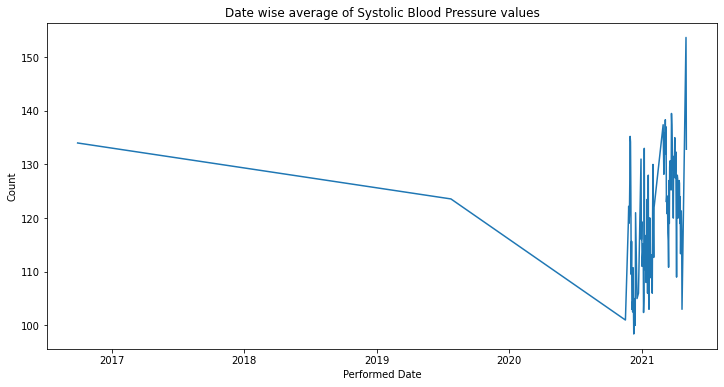

In [188]:
plt.figure(figsize=(12, 6))
plt.title('Date wise average of Systolic Blood Pressure values')
plt.xlabel('Performed Date')
plt.ylabel('Count')
plt.plot(sbpValueMeans.index, sbpValueMeans)

## Combined line plots

In [136]:
combinedDf1 = dataDf[
    (dataDf.TYPE == 'Heart Rate Monitored')
    | (dataDf.TYPE == 'Respiratory Rate')
    | (dataDf.TYPE == 'Temperature Temporal')
    | (dataDf.TYPE == 'Diastolic Blood Pressure')
    | (dataDf.TYPE == 'Systolic Blood Pressure')
    ]
combinedDf1

,PATIENT_ID,TYPE,RESULT,ORDER_DATETIME,PERFORMED_DATETIME,NORMAL_LOW,NORMAL_HIGH,CRITICAL_LOW,CRITICAL_HIGH,IS_NUMERIC,PERFORMED_DATE
395,2169055,Systolic Blood Pressure,134,NaN,2016-09-29 14:40:48,90,140,,,True,2016-09-29
397,2169055,Respiratory Rate,20,NaN,2016-09-29 14:40:48,14,20,,,True,2016-09-29
398,2169055,Diastolic Blood Pressure,86,NaN,2016-09-29 14:40:48,60,90,,,True,2016-09-29
3837,2169055,Systolic Blood Pressure,122,NaN,2019-07-25 09:41:53,101,179,90,200,True,2019-07-25
3839,2169055,Temperature Temporal,36.8,NaN,2019-07-25 10:06:17,35.5,38.3,NaN,NaN,True,2019-07-25
...,...,...,...,...,...,...,...,...,...,...,...
42539,2169055,Respiratory Rate,16,NaN,2021-05-04 14:18:53,11,24,6,36,True,2021-05-04
42568,2169055,Temperature Temporal,36.3,NaN,2021-05-04 17:50:13,35.5,38.3,NaN,NaN,True,2021-05-04
42569,2169055,Diastolic Blood Pressure,48,NaN,2021-05-04 17:50:13,60,90,NaN,NaN,True,2021-05-04
42570,2169055,Systolic Blood Pressure,119,NaN,2021-05-04 17:50:13,101,179,90,200,True,2021-05-04


In [137]:
combinedDf1.TYPE.value_counts()

Respiratory Rate            582
Diastolic Blood Pressure    553
Systolic Blood Pressure     548
Temperature Temporal        411
Heart Rate Monitored        365
Name: TYPE, dtype: int64

In [140]:
combinedDf1['RESULT'] = combinedDf1['RESULT'].astype(float)

/tmp/ipykernel_4193604/1850698039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combinedDf1['RESULT'] = combinedDf1['RESULT'].astype(float)


In [143]:
averageValuesDf = combinedDf1.groupby(['PERFORMED_DATE', 'TYPE']).RESULT.mean().reset_index()
averageValuesDf

,PERFORMED_DATE,TYPE,RESULT
0,2016-09-29,Diastolic Blood Pressure,86.000000
1,2016-09-29,Respiratory Rate,20.000000
2,2016-09-29,Systolic Blood Pressure,134.000000
3,2019-07-25,Diastolic Blood Pressure,72.444444
4,2019-07-25,Heart Rate Monitored,49.428571
...,...,...,...
555,2021-05-03,Temperature Temporal,36.533333
556,2021-05-04,Diastolic Blood Pressure,72.166667
557,2021-05-04,Respiratory Rate,16.800000
558,2021-05-04,Systolic Blood Pressure,132.833333


<AxesSubplot:title={'center':'Date wise average value of vitals'}, xlabel='Performed Date', ylabel='Value'>

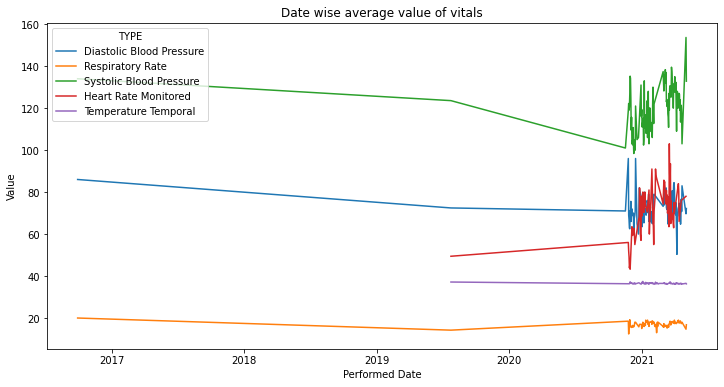

In [147]:
plt.figure(figsize=(12, 6))
plt.title('Date wise average value of vitals')
plt.xlabel('Performed Date')
plt.ylabel('Value')
sns.lineplot(data=averageValuesDf, x='PERFORMED_DATE', y='RESULT', hue='TYPE')

In [150]:
averageValuesDf[averageValuesDf.PERFORMED_DATE > dt.date(year=2020,month=10,day=1)]

,PERFORMED_DATE,TYPE,RESULT
8,2020-11-17,Diastolic Blood Pressure,71.000000
9,2020-11-17,Systolic Blood Pressure,101.000000
10,2020-11-25,Diastolic Blood Pressure,96.000000
11,2020-11-25,Heart Rate Monitored,56.000000
12,2020-11-25,Respiratory Rate,18.500000
...,...,...,...
555,2021-05-03,Temperature Temporal,36.533333
556,2021-05-04,Diastolic Blood Pressure,72.166667
557,2021-05-04,Respiratory Rate,16.800000
558,2021-05-04,Systolic Blood Pressure,132.833333


<AxesSubplot:title={'center':'Date wise average value of vitals (Date>2020)'}, xlabel='Performed Date', ylabel='Value'>

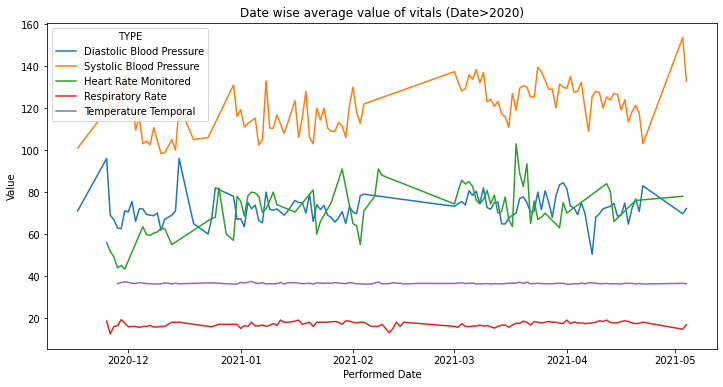

In [155]:
plt.figure(figsize=(12, 6))
plt.title('Date wise average value of vitals (Date>2020)')
plt.xlabel('Performed Date')
plt.ylabel('Value')
sns.lineplot(
    data=averageValuesDf[averageValuesDf.PERFORMED_DATE > dt.date(year=2020,month=1,day=1)],
    x='PERFORMED_DATE',
    y='RESULT',
    hue='TYPE'
    )